# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it.

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:

- age: age of the user
- sex: gender of the user
- bmi: body mass index, providing an understanding of body
- children: number of children covered by health insurance / number of dependents
- smoker: smoker or not
- region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided:

- charges: the medical cost

#### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types. Which features are numerical features and which users are categorical features?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('https://raw.githubusercontent.com/cisdatasciencetu/CIS3715_DataScience_2023/main/Lab02/insurance.csv')
print('features    data types\n--------    ----------')
print(df.dtypes)
print('\n')
print(df.describe())
print('\n')
print(df.info())
print('\nNumerical features: Age, BMI, Children, Charges')
print('Categorical features: Sex, Smoker, Region')


features    data types
--------    ----------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2 

#### Q2. Check whether there are missing values in this dataset.

In [2]:
print("\nCheck missing values: \n")
print("features    missing values \n--------    --------------\n{}".format(df.isnull().sum()))


Check missing values: 

features    missing values 
--------    --------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature.

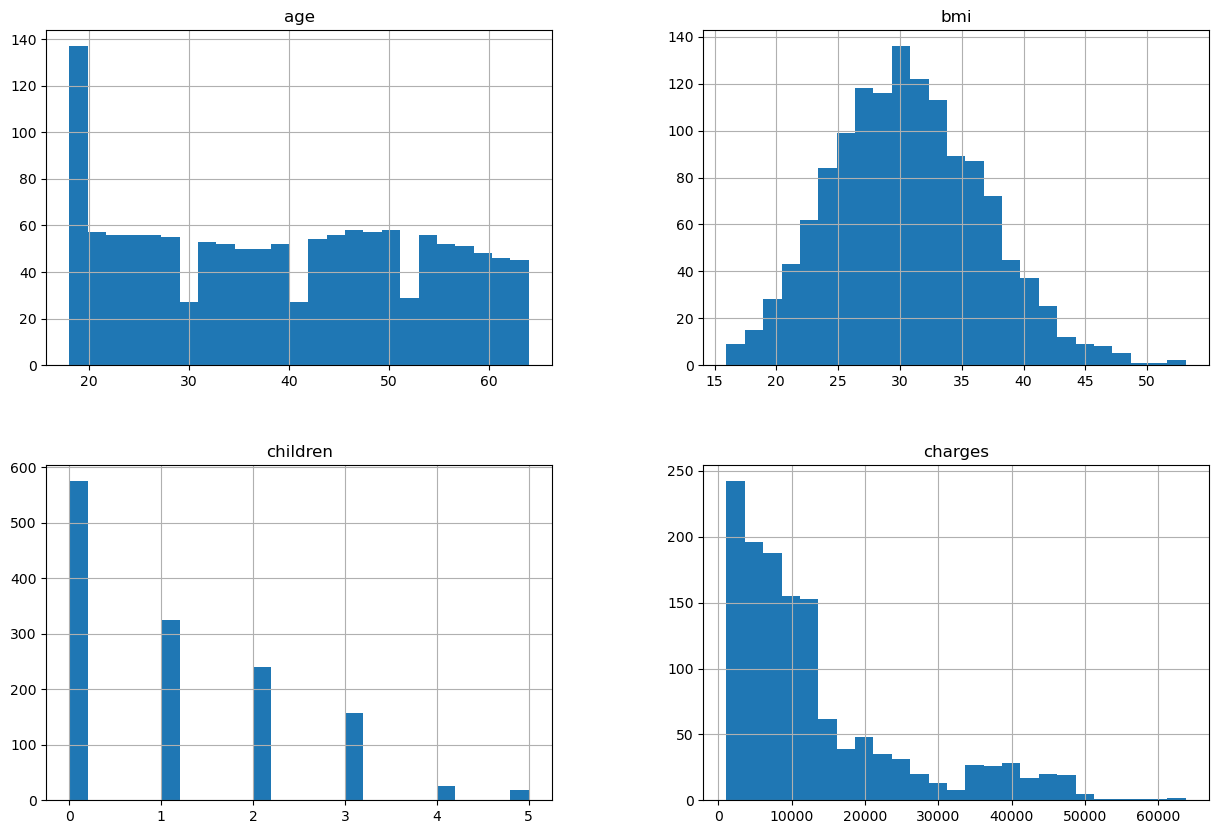

In [3]:
df.hist(bins = 25, figsize = (15,10))
plt.show()

#### Q4. Use corr() function of Pandas to show the correlation between different numerical features


In [4]:
hcorr = df.corr()
hcorr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

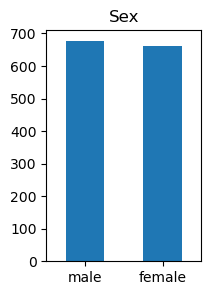

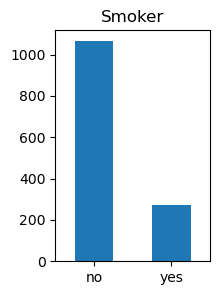

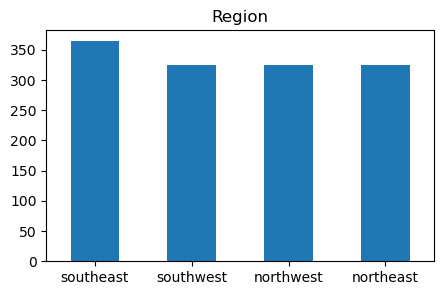

In [5]:
df['sex'].value_counts().plot(kind = 'bar',figsize=(2,3), rot=0)
plt.title('Sex')
plt.show()
df['smoker'].value_counts().plot(kind = 'bar',figsize=(2,3), rot=0)
plt.title('Smoker')
plt.show()
df['region'].value_counts().plot(kind = 'bar',figsize=(5,3), rot=0)
plt.title('Region')
plt.show()


#### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [6]:
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])

print(df['sex'].value_counts())
print("\n{}".format(df['smoker'].value_counts()))
print("\n{}".format(df['region'].value_counts()))

1    676
0    662
Name: sex, dtype: int64

0    1064
1     274
Name: smoker, dtype: int64

2    364
3    325
1    325
0    324
Name: region, dtype: int64


#### Q7. Normalize all numerical features

In [7]:
print('Original data\n-------------\n{}'.format(df))

df_min = df.min(axis = 0)
df_max = df.max(axis = 0)
print('\nMin\n---\n{}'.format(df_min))
print('\nMax\n---\n{}'.format(df_max))

df = (df - df_min) / (df_max - df_min)
print('\nScaling data\n------------')
print(df)

Original data
-------------
      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

Min
---
age           18.0000
sex            0.0000
bmi           15.9600
children       0.0000
smoker         0.0000
region         0.0000
charges     1121.8739
dtype: float64

Max
---
age            6

#### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [8]:
df.to_csv('preprocessed_insurance.csv')